In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## data
x,y = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [3]:
## functions
def A(x,y):
    return (1-x)*(y**3)+x*(1+y**3)*np.exp(-1)+\
                (1-y)*x*(np.exp(-x)-np.exp(-1))+\
                y*((1+x)*np.exp(-x)-1+x-2*x*np.exp(-1))
def Axx(x,y):
    return np.exp(-x)*(x+y-2)

def Ayy(x,y):
    return 6*y*(1-x+x*np.exp(-1))

def Phi(x,y,v,wx,wy,u):
    return A(x,y) + x*(1-x)*y*(1-y)*N(x,y,v,wx,wy,u)

def f2(x,y):
    return np.exp(-x)*(x-2+y**3+6*y)

def Acti(x):
    return 1/(1+np.exp(-x))
def dActi(x):
    return np.exp(x)/(1+np.exp(x))**2  
def d2Acti(x):
    return -np.exp(x)*(np.exp(x)-1)/(1+np.exp(x))**3
def d3Acti(x):
    return np.exp(x)*(-4*np.exp(x)+np.exp(2*x)+1)/(1+np.exp(x))**4

def h(x,y): 
    return x*(1-x)*y*(1-y)
def hx(x,y):     # hy(x,y) = hx(y,x)
    return (1-2*x)*y*(1-y)
def hxx(x,y):    # hyy(x,y) = hxx(y,x)
    return -2*y*(1-y)
    

def F(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y) + hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    return np.mean(rk**2)/2 
    
def dF_u(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*(dActi(wx*x+wy*y+u))))+\
          2*hx(x,y)*(np.sum(v*wx*(d2Acti(wx*x+wy*y+u)))) +\
          h(x,y)*((v*(wx**2)*(d3Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum(v*(dActi(wx*x+wy*y+u)))) + \
            2*hx(y,x)*(np.sum(v*wy*(d2Acti(wx*x+wy*y+u)))) + \
            h(x,y)*(np.sum(v*(wy**2)*(d3Acti(wx*x+wy*y+u)))) 
    return np.mean(rk*drk)

def dF_v(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(Acti(wx*x+wy*y+u))+\
         2*hx(x,y)*(np.sum(wx*(dActi(wx*x+wy*y+u)))) + \
        h(x,y)*(np.sum((wx**2)*(d2Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum((Acti(wx*x+wy*y+u)))) + \
        2*hx(y,x)*(np.sum(wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*(np.sum((wy**2)*(d2Acti(wx*x+wy*y+u)))) 
    return np.mean(rk*drk)

def dF_wx(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*x*(dActi(wx*x+wy*y+u))))+\
         2*hx(x,y)*(v*(dActi(wx*x+wy*y+u))+ np.sum(x*wx*v*(d2Acti(wx*x+wy*y+u)))) + \
        h(x,y)*(2*wx*v*(d2Acti(wx*x+wy*y+u))+np.sum((wx**2)*x*v*(d3Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum(v*x*(dActi(wx*x+wy*y+u)))) + \
        2*hx(y,x)*(np.sum(x*v*wy*(d2Acti(wx*x+wy*y+u)))) + \
         h(x,y)*(np.sum(x*v*(wy**2)*(d3Acti(wx*x+wy*y+u))))
    return np.mean(rk*drk)

def dF_wy(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*y*(dActi(wx*x+wy*y+u))))+\
         2*hx(x,y)*(v*wx*y*(d2Acti(wx*x+wy*y+u))) + \
        h(x,y)*(2*wx*wx*y*v*(d3Acti(wx*x+wy*y+u)))+\
          hxx(y,x)*(np.sum(v*y*(dActi(wx*x+wy*y+u)))) + \
        2*hx(y,x)*( v*(dActi(wx*x+wy*y+u))+np.sum(y*v*wy*(d2Acti(wx*x+wy*y+u)))) + \
         h(x,y)*( 2*wy*v*(d2Acti(wx*x+wy*y+u))+np.sum(y*v*(wy**2)*(d3Acti(wx*x+wy*y+u))))
    return np.mean(rk*drk)

Write out all gradient descend methods:

In [4]:
## Nesterov's accelerated gradient descend
def NAG(alpha,tol = 1e-3,max_iter = 1e4):
    v,wx,wy,u = 0.5*np.ones(4)
    theta = 0.5*np.ones(4)
    grad = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
    iter_ = 0
    val = [np.sum(grad**2)]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('alpha=',alpha,', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}  
        
        mu = 1 - 3/(5+iter_)
        
        theta_new = np.array([v,wx,wy,u]) - alpha*grad
        v,wx,wy,u = (1+mu)*theta_new - mu*theta
        theta = theta_new.copy()
        
        grad = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
        val.append(np.sum(grad**2))
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]}

In [5]:
## Nesterov's accelerated stochastic gradient descend
def NASG(batch_size,redc_type,x=x,y=y,tol=1e-3,max_iter = 10000):
    if redc_type == 0:
        alpha = 1/(np.arange(1,max_iter+1))
    elif redc_type == 1:
        alpha = 1/(np.arange(1,max_iter+1))**(3/2)
    
    randn = np.random.randint(100,size=(max_iter,batch_size))
    
    v,wx,wy,u = 0.5*np.ones(4)
    theta = 0.5*np.ones(4)
    iter_ = 0
    x_,y_ = x[randn[iter_]],y[randn[iter_]]
    grad = np.array([dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)])
    grad0 = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
    val = [np.sum(grad0**2)]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('batchsize=',batch_size, ', type=',redc_type,', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}   

        mu = 1 - 3/(5+iter_)
        
        theta_new = np.array([v,wx,wy,u]) - alpha[iter_]*grad
        v,wx,wy,u = (1+mu)*theta_new - mu*theta
        theta = theta_new.copy()
        
        x_,y_ = x[randn[iter_]],y[randn[iter_]]
        grad = np.array([dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),\
                                           dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)])
        grad0 = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
        val.append(np.sum(grad0**2))
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]} 

In [6]:
## Adam gradient descend
def AdamGD(b1=0.9,b2=0.999,eps=1e-8,eta=0.001,tol = 1e-3,max_iter = 1e4):
    
    v,wx,wy,u,vv= 0.5*np.ones(5)
    m = 0.5*np.ones(4)
    grad = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
    iter_ = 0
    val = [np.sum(grad**2)]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('eta=',eta,'b1=',b1, ', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}  
        
        m = b1*m + (1-b1)*grad
        vv = b2*vv + (1-b2)*(grad*grad)
        m_hat = m/(1-b1**iter_)
        v_hat = vv/(1-b2**iter_)
        
        v,wx,wy,u = np.array([v,wx,wy,u]) - eta*m_hat/(np.sqrt(v_hat)+eps)

        grad = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
        val.append(np.sum(grad**2))
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]}

In [7]:
## Adam Stochastic Gradient Descend
def AdamSG(batch_size,b1=0.9,b2=0.999,eps=1e-8,eta=0.001,x=x,y=y,tol=1e-3,max_iter = 10000):
    
    randn = np.random.randint(100,size=(max_iter,batch_size))
    
    # parameters
    
    v,wx,wy,u,vv = 0.5*np.ones(5)
    m = 0.5*np.ones(4)
    iter_ = 0
    x_,y_ = x[randn[iter_]],y[randn[iter_]]
    grad = np.array([dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)])
    grad0 = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
    val = [np.sum(grad0**2)]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('batchsize=',batch_size, ', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}   

        m = b1*m + (1-b1)*grad
        vv = b2*vv + (1-b2)*(grad*grad)
        m_hat = m/(1-b1**iter_)
        v_hat = vv/(1-b2**iter_)
        
        v,wx,wy,u = np.array([v,wx,wy,u]) - eta*m_hat/(np.sqrt(v_hat)+eps)

        grad = np.array([dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)])
        grad0 = np.array([dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)])
        val.append(np.sum(grad0**2))
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]} 

Experiments:

0.008536892523389936 
 [0.46601508427594257, 2.751171672973376, 0.09778505150183067, 6.344640353996751]


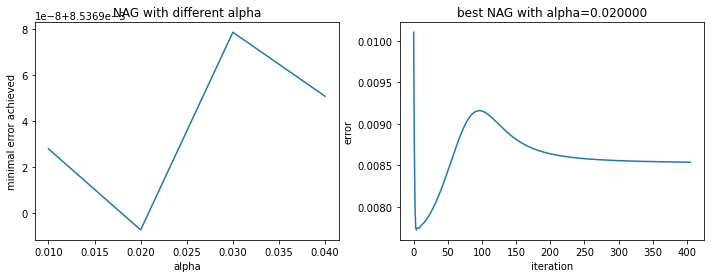

In [8]:
# NAG
naFs = []
alpha = [0.01,0.02,0.03,0.04]
for alp in alpha:
    outgd = NAG(alp)
    naFs.append(outgd['F'][-1])
naFs = np.array(naFs)
Fmin = np.min(naFs)
alpmin = alpha[np.argmin(naFs)]
outgd = NAG(alpmin)
naFF = outgd['F']
print(Fmin,'\n',outgd['var'])

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(alpha,naFs,label='NAG')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('minimal error achieved')
ax[0].set_title('NAG with different alpha')

ax[1].plot(range(len(naFF)),naFF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best NAG with alpha=%f'%alpmin)

plt.show()

batchsize= 10 , type= 0 , excess max iterations
batchsize= 10 , type= 1 , excess max iterations
batchsize= 20 , type= 0 , excess max iterations
batchsize= 20 , type= 1 , excess max iterations
batchsize= 30 , type= 0 , excess max iterations
batchsize= 30 , type= 1 , excess max iterations
batchsize= 40 , type= 0 , excess max iterations
batchsize= 40 , type= 1 , excess max iterations
batchsize= 10 , type= 0 , excess max iterations
0.00041029744314399687 
 [0.8436330264165801, -0.9337832243774529, 1.500840524669324, -0.0066923225818394955]


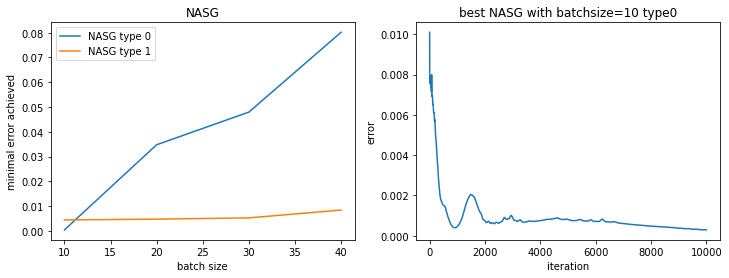

In [9]:
# NASG
nasFs = []
batchs = np.arange(10,50,10)
for bs in batchs:
    for types in [0,1]:
        outsgd = NASG(bs,types)
        nasFs.append(outsgd['F'][-1])
nasFs = np.array(nasFs)
nasFmin = np.min(nasFs)
batchs_min = batchs[np.argmin(nasFs)//2]
typemin = np.argmin(nasFs)%2

outsgd = NASG(batchs_min,typemin)
nasF = outsgd['F']
print(nasFmin,'\n',outsgd['var'])
nasFs = nasFs.reshape(-1,2)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(batchs,nasFs[:,0],label='NASG type 0')
ax[0].plot(batchs,nasFs[:,1],label='NASG type 1')
ax[0].set_xlabel('batch size')
ax[0].set_ylabel('minimal error achieved')
ax[0].legend()
ax[0].set_title('NASG')

ax[1].plot(range(len(nasF)),nasF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best NASG with batchsize=%i'%batchs_min+' type%i'%typemin)

plt.show()

0.008536783273300912 
 [0.4660478650399631, 2.544005993153881, 0.1255034025999684, 6.281433266618396]


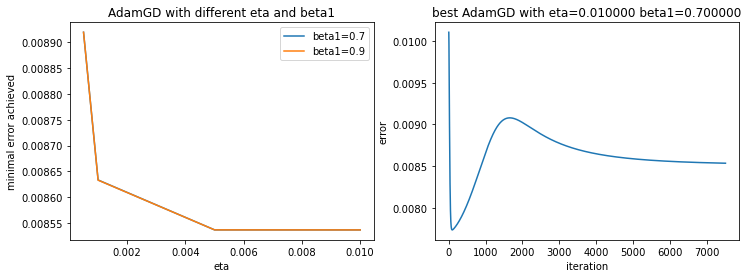

In [17]:
# Adam
adamFs = []
b1s = [0.7,0.9]
etas = [0.01,0.005,0.001,0.0005]
for eta in etas:
    for b1 in b1s:
        outgd = AdamGD(b1=b1,eta=eta)
        adamFs.append(outgd['F'][-1])
adamFs = np.array(adamFs)
Fmin = np.min(adamFs)
b1min = b1s[np.argmin(adamFs)%2]
etamin = etas[np.argmin(adamFs)//2]
outgd = AdamGD(b1=b1min,eta=etamin)
adamFF = outgd['F']
print(Fmin,'\n',outgd['var'])

adamFs = adamFs.reshape(4,2)
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(etas,adamFs[:,0],label='beta1=0.7')
ax[0].plot(etas,adamFs[:,1],label='beta1=0.9')
ax[0].set_xlabel('eta')
ax[0].set_ylabel('minimal error achieved')
ax[0].legend()
ax[0].set_title('AdamGD with different eta and beta1')

ax[1].plot(range(len(adamFF)),adamFF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best AdamGD with eta=%f'%etamin+' beta1=%f'%b1min)

plt.show()

batchsize= 30 , excess max iterations
0.00018804967724858328 
 [3.2827515403975043, -0.3639637577869878, 0.6243098088334225, -1.9199240234028017]


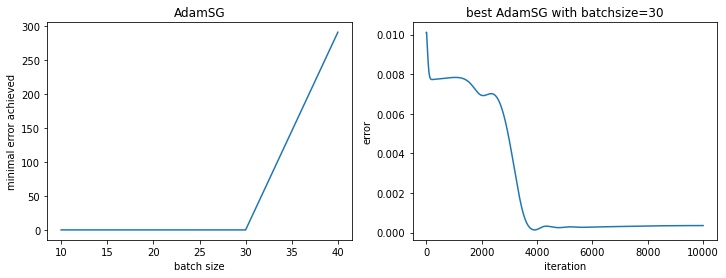

In [25]:
# AdamSG
adamsFs = []
batchs = np.arange(10,50,10)
for bs in batchs:
    outsgd = AdamSG(batch_size=bs,b1=b1min,eta=etamin)
    adamsFs.append(outsgd['F'][-1])
adamsFs = np.array(adamsFs)
sFmin = np.min(adamsFs)
batchs_min = batchs[np.argmin(adamsFs)]

outsgd = AdamSG(batchs_min,b1=b1min,eta=etamin)
adamsF = outsgd['F']
print(sFmin,'\n',outsgd['var'])

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(batchs,adamsFs,label='AdamSG')
ax[0].set_xlabel('batch size')
ax[0].set_ylabel('minimal error achieved')
ax[0].set_title('AdamSG')

ax[1].plot(range(len(adamsF)),adamsF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best AdamSG with batchsize=%i'%batchs_min)

plt.show()

Text(0.5, 1.0, 'best models comparison')

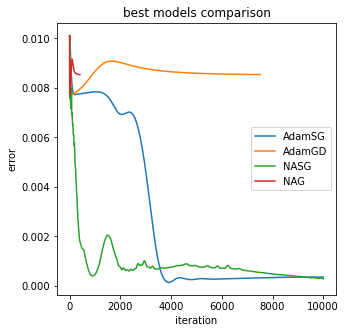

In [26]:
## compare the best model for each one
fig = plt.figure(figsize=(5,5))

plt.plot(range(len(adamsF)),adamsF,label='AdamSG')
plt.plot(range(len(adamFF)),adamFF,label='AdamGD')
plt.plot(range(len(nasF)),nasF,label='NASG')
plt.plot(range(len(naFF)),naFF,label='NAG')

plt.xlabel('iteration')
plt.ylabel('error')
plt.legend()
plt.title('best models comparison')